In [111]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


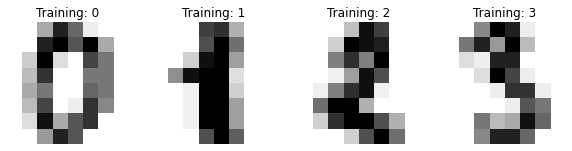

In [112]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [113]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

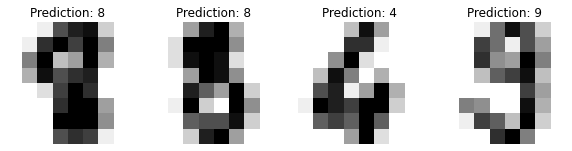

In [114]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [115]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


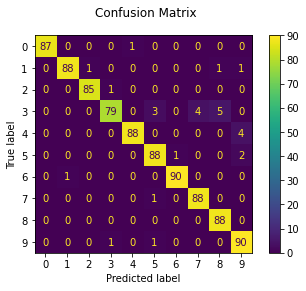

In [116]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Code chụp webcam: Import từ Google Colab


In [117]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


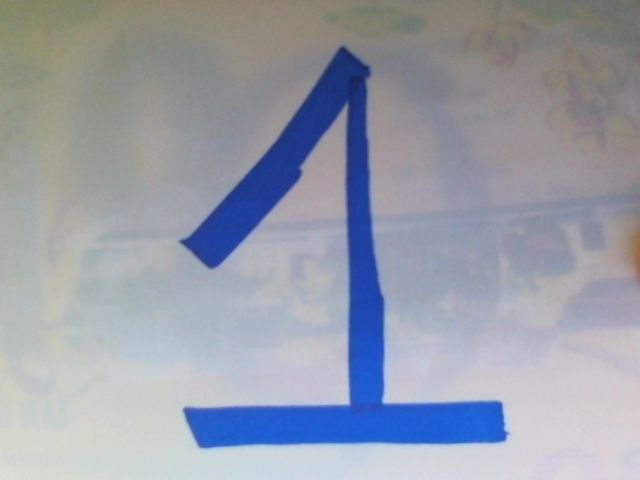

In [248]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Crop image: Cắt hình ảnh theo edge detection
Tham khảo tại: https://www.codeproject.com/Questions/5263477/How-do-I-crop-a-subimage-from-an-image-with-edge-d

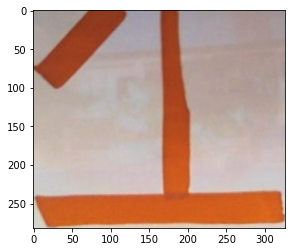

In [249]:
import cv2
import numpy as np
import matplotlib.image as mpimg #
#img = cv2.imread("test.png")
img = cv2.imread("photo.jpg")
blurred = cv2.blur(img,(8,8))
canny = cv2.Canny(blurred, 50, 200)

## find the non-zero min-max coords of canny
pts = np.argwhere(canny>0)
y1,x1 = pts.min(axis=0)
y2,x2 = pts.max(axis=0)

## crop the region
cropped = img[y1:y2, x1:x2]
cv2.imwrite("cropped.png", cropped)

tagged = cv2.rectangle(img.copy(), (x1,y1), (x2,y2), (0,255,0), 3, cv2.LINE_AA)

imgplot = plt.imshow(cropped)
plt.show()


Edge detection: Vì hình ảnh đưa vào rất lớn, nếu resize sẽ dẫn đến kết quả không như mong muốn nên dùng edge detection để thu gọn hình ảnh lại.
Tham khảo tại: https://docs.opencv.org/master/da/d22/tutorial_py_canny.html


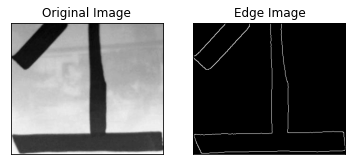

In [250]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('cropped.png',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [251]:
import cv2
import numpy as np

img = cv2.resize(img, (8, 8), interpolation = cv2.INTER_AREA)


In [252]:
print(img)
print(img.size)

[[155  95  85 162 104 159 152 150]
 [121  74 156 166 104 159 154 151]
 [105 153 177 171  99 159 157 157]
 [174 177 180 178  91 164 165 165]
 [182 182 184 184  88 180 179 179]
 [194 191 196 195  96 193 192 195]
 [184 175 174 172 100 167 165 167]
 [122 100 103 105 107 106 106 116]]
64


Tham khảo cách chuyển dữ liệu về scale [0,1] của nhóm:
https://github.com/PhanTung-06/CS114.L21/tree/main/Recognizing_hand-written_digits

In [253]:
img = img/225*15
img = img.reshape(1, -1)
print(img)

[[10.33333333  6.33333333  5.66666667 10.8         6.93333333 10.6
  10.13333333 10.          8.06666667  4.93333333 10.4        11.06666667
   6.93333333 10.6        10.26666667 10.06666667  7.         10.2
  11.8        11.4         6.6        10.6        10.46666667 10.46666667
  11.6        11.8        12.         11.86666667  6.06666667 10.93333333
  11.         11.         12.13333333 12.13333333 12.26666667 12.26666667
   5.86666667 12.         11.93333333 11.93333333 12.93333333 12.73333333
  13.06666667 13.          6.4        12.86666667 12.8        13.
  12.26666667 11.66666667 11.6        11.46666667  6.66666667 11.13333333
  11.         11.13333333  8.13333333  6.66666667  6.86666667  7.
   7.13333333  7.06666667  7.06666667  7.73333333]]


In [254]:
print(clf.predict(img))
result = clf.predict(img)

[1]


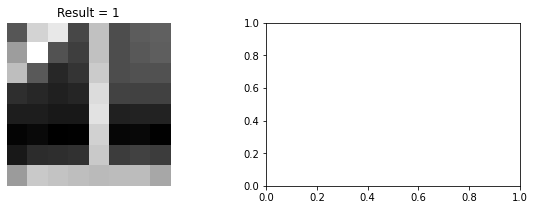

In [255]:
_, axes = plt.subplots(nrows=1, ncols=2 , figsize=(10, 3))
for ax, image, label in zip(axes, img, result):
    ax.set_axis_off()
    img = np.reshape(img, (8, 8))
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Result = %i' % result)